In [ ]:
#Importing necessary libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Input, Dropout,Flatten,Activation,Convolution2D,MaxPooling2D,GlobalAveragePooling2D,BatchNormalization
from tensorflow.keras.models import Model,Sequential

import random

In [ ]:
#Reading the data
data = pd.read_csv('training.csv')

In [ ]:
data.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,23.452872,37.389402,56.953263,29.033648,80.227128,32.228138,40.227609,29.002322,16.356379,29.647471,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,24.472511,33.144443,53.987404,28.275949,78.634213,30.405923,42.728851,26.146043,16.865362,27.058860,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,24.976421,36.603221,55.742526,27.570947,78.887368,32.651621,42.193895,28.135453,16.791158,32.087116,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,25.307270,38.007903,56.433809,30.929864,77.910261,31.665725,41.671513,31.049990,20.458017,29.909343,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,22.506110,38.305237,57.249571,30.672177,77.762945,31.737247,38.035436,30.935382,15.925870,30.672177,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [ ]:
#Removing all rows having Nan
data = data.dropna(axis=0)

In [ ]:
#Processing Our Data
image=data['Image'].values

In [ ]:
images=[]
for i in range(len(image)):
  img =list(map(int,image[i].split()))
  array = np.array(img, dtype=np.uint8) 
  array = array.reshape(96,96,1)
  images.append(array)
images=np.array(images)

In [ ]:
#Training Data
X_train = images
y_train = data.drop('Image',axis=1)

In [ ]:
y_train=np.array(y_train)

In [ ]:
X_train.shape,y_train.shape

((2140, 96, 96, 1), (2140, 30))

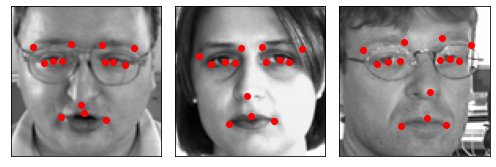

In [ ]:
#Visualizing trining data
n = len(images)
f = plt.figure(figsize=(7,7))
for i in range(3):
  x = random.randint(0,n)
  f.add_subplot(1, 3, i + 1)
  plt.imshow(images[x].reshape(96,96),cmap='gray')
  i=0
  while(i<len(y_train[x])-2):
    plt.plot(y_train[x][i],y_train[x][i+1],'ro')
    i+=2
  plt.xticks([])
  plt.yticks([])
plt.tight_layout()

In [ ]:
#Building our Convolutional Neural Network
model = Sequential()

#First Convolution Layer
model.add(Convolution2D(24,(3, 3), padding="same", input_shape=(96, 96,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#Second Convolution Layer
model.add(Convolution2D(128,(5,5),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#Third Convolution Layer
model.add(Convolution2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#Fourth Convolution Layer
model.add(Convolution2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#Fifth Convolution Layer
model.add(Convolution2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully Connected Layer 1
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

#Fully Connected Layer 2
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(30))
model.compile(optimizer = 'Adam',loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 96, 96, 24)        240       
_________________________________________________________________
batch_normalization_1 (Batch (None, 96, 96, 24)        96        
_________________________________________________________________
activation_1 (Activation)    (None, 96, 96, 24)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 24)        0         
_________________________________________________________________
dropout (Dropout)            (None, 48, 48, 24)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 128)       76928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 48, 48, 128)      

In [ ]:
#Fitting our model
epochs = 20
hist = model.fit(X_train, y_train, 
                 validation_split=0.2, 
                 epochs=epochs, 
                 batch_size=20)

Epoch 1/20
86/86 [==============================] - 250s 3s/step - loss: 1407.0978 - accuracy: 0.0812 - val_loss: 1006.4431 - val_accuracy: 0.0234
Epoch 2/20
86/86 [==============================] - 254s 3s/step - loss: 328.1763 - accuracy: 0.2611 - val_loss: 364.7400 - val_accuracy: 0.4159
Epoch 3/20
86/86 [==============================] - 249s 3s/step - loss: 67.0968 - accuracy: 0.6116 - val_loss: 132.8287 - val_accuracy: 0.4322
Epoch 4/20
86/86 [==============================] - 250s 3s/step - loss: 29.8909 - accuracy: 0.7313 - val_loss: 57.3696 - val_accuracy: 0.4322
Epoch 5/20
86/86 [==============================] - 249s 3s/step - loss: 24.5341 - accuracy: 0.7629 - val_loss: 43.4275 - val_accuracy: 0.4322
Epoch 6/20
86/86 [==============================] - 248s 3s/step - loss: 20.6598 - accuracy: 0.7710 - val_loss: 24.6321 - val_accuracy: 0.4322
Epoch 7/20
86/86 [==============================] - 247s 3s/step - loss: 19.3410 - accuracy: 0.7722 - val_loss: 30.3759 - val_accuracy:

In [16]:
#Testing Data
test_data = pd.read_csv('test.csv')

In [17]:
image=test_data['Image'].values

In [18]:
#Processesing the test data
test_images=[]
for i in range(len(image)-1):
  img =list(map(int,image[i].split()))
  array = np.array(img, dtype=np.uint8) 
  array = array.reshape(96,96,1)
  test_images.append(array)
test_images=np.array(test_images)

In [19]:
X_test=test_images

In [20]:
#Predicting on our Test Data
features = model.predict(X_test, batch_size=1)

In [21]:
features

array([[66.4891  , 37.11298 , 29.557945, ..., 71.16941 , 47.566948,
        83.4834  ],
       [66.84308 , 37.635254, 29.437252, ..., 71.88625 , 47.46883 ,
        85.28729 ],
       [65.67187 , 36.772278, 29.464247, ..., 71.09622 , 47.19012 ,
        82.94114 ],
       ...,
       [65.99653 , 37.166313, 29.066124, ..., 70.91544 , 46.862495,
        84.35535 ],
       [66.31806 , 37.208927, 29.206964, ..., 71.02881 , 47.14871 ,
        84.189835],
       [66.1148  , 37.152626, 29.400114, ..., 70.68616 , 47.176258,
        83.75955 ]], dtype=float32)

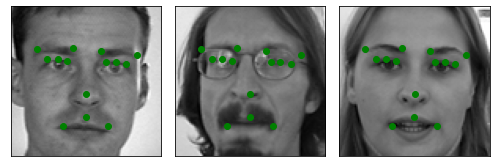

In [37]:
#Visualizing the output from the predictions 
n = len(X_test)
f = plt.figure(figsize=(7,7))
for i in range(3):
  x = random.randint(0,n)
  f.add_subplot(1, 3, i + 1)
  plt.imshow(X_test[x].reshape(96,96),cmap='gray')
  i=0
  while(i<len(features[x])-2):
    plt.plot(features[1][i],y_train[1][i+1],'go')
    i+=2
  plt.xticks([])
  plt.yticks([])
plt.tight_layout()